## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
"Resources/bitstamp.csv"

'Resources/bitstamp.csv'

In [3]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
csvpath = Path("Resources/bitstamp.csv")
bitstamp = pd.read_csv(csvpath, parse_dates=True, infer_datetime_format=True)
bitstamp = bitstamp.set_index("Timestamp")

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [4]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head(10)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
2018-01-01 00:05:00,13620.00,13634.15,13610.00,$13610.0,4.716162,64226.303028,13618.341726
2018-01-01 00:06:00,13610.00,13650.18,13590.42,$13600.56,26.432759,360108.155630,13623.555198
2018-01-01 00:07:00,13593.99,13595.41,13566.93,$13580.0,10.674241,144961.611180,13580.507983
2018-01-01 00:08:00,13580.00,13580.00,13547.59,$13579.0,19.322370,261942.833550,13556.454543


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [19]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters

csvpath = Path("Resources/coinbase.csv")
coinbase = pd.read_csv(csvpath, parse_dates=True, infer_datetime_format=True)
coinbase = coinbase.set_index("Timestamp")

In [20]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head(3)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506


In [21]:
coinbase.tail(3)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [8]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna(how="any")

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [9]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:,'Close'] = bitstamp['Close'].str.replace("$", "")

C:\Users\ANASTA~1\AppData\Local\Temp/ipykernel_44704/4062005378.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:,'Close'] = bitstamp['Close'].str.replace("$", "")


### Step 3: Convert the data type of the Close column to a `float`.

In [10]:
# Convert the Close data type to a float
bitstamp['Close'] = bitstamp['Close'].astype(float)

In [11]:
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [17]:
# Review the data for duplicate values, and drop them if necessary
bitstamp = bitstamp.drop_duplicates()

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [22]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna(how="any")
coinbase.loc[:,'Close'] = coinbase['Close'].str.replace("$", "")
coinbase['Close'] = coinbase['Close'].astype(float)
coinbase = coinbase.drop_duplicates()

C:\Users\ANASTA~1\AppData\Local\Temp/ipykernel_44704/1557288530.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:,'Close'] = coinbase['Close'].str.replace("$", "")


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [26]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp[['Close']]
# Review the first five rows of the DataFrame
bitstamp_sliced.head(5)

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [28]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase [['Close']]

# Review the first five rows of the DataFrame
coinbase_sliced.head(5)

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [29]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [30]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

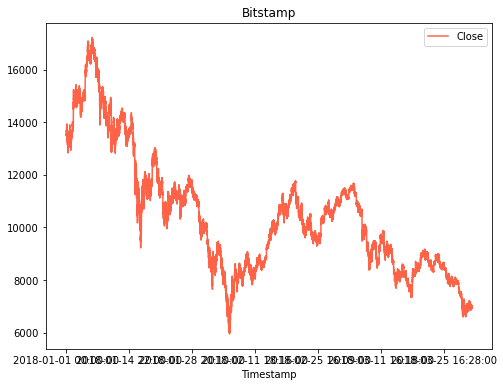

In [31]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(8, 6), title = "Bitstamp", color='tomato')


<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

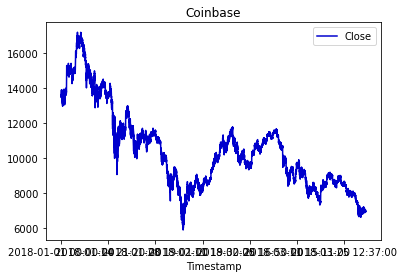

In [32]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(6, 4), title = "Coinbase", color='mediumblue')

In [44]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
combined_df = bitstamp_sliced.join(coinbase_sliced, lsuffix='_Bitstamp', rsuffix='_Coinbase')
new_index = combined_df.index
new_index = pd.to_datetime(new_index)
combined_df = combined_df.set_index(new_index)

<AxesSubplot:title={'center':'Bitstamp & Coinbase'}, xlabel='Timestamp'>

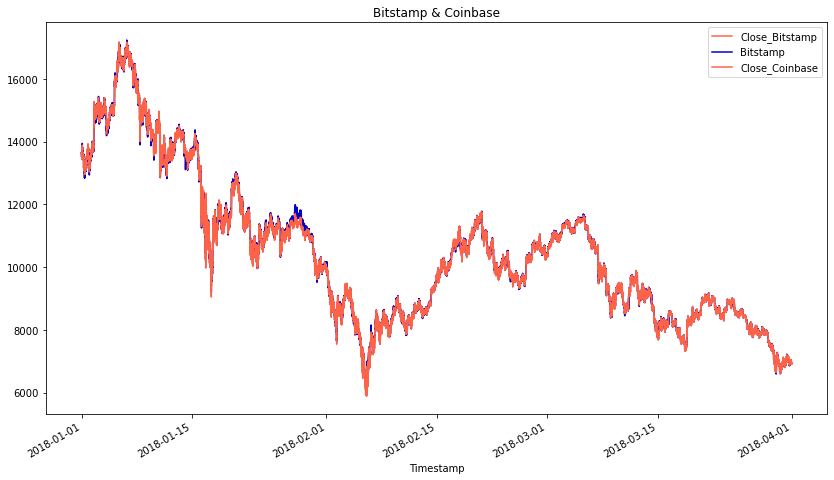

In [45]:
combined_df.plot(figsize=(14,8), title='Bitstamp & Coinbase', color=['tomato', 'mediumblue'])

In [37]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
new_index = combined_df.index
new_index = pd.to_datetime(new_index)
combined_df = combined_df.set_index(new_index)

C:\Users\ANASTA~1\AppData\Local\Temp/ipykernel_44704/4050029408.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  combined_df["03/2018"].plot(figsize=(14, 8), title='Bitstamp & Coinbase', color=['tomato', 'mediumblue'])


<AxesSubplot:title={'center':'Bitstamp & Coinbase'}, xlabel='Timestamp'>

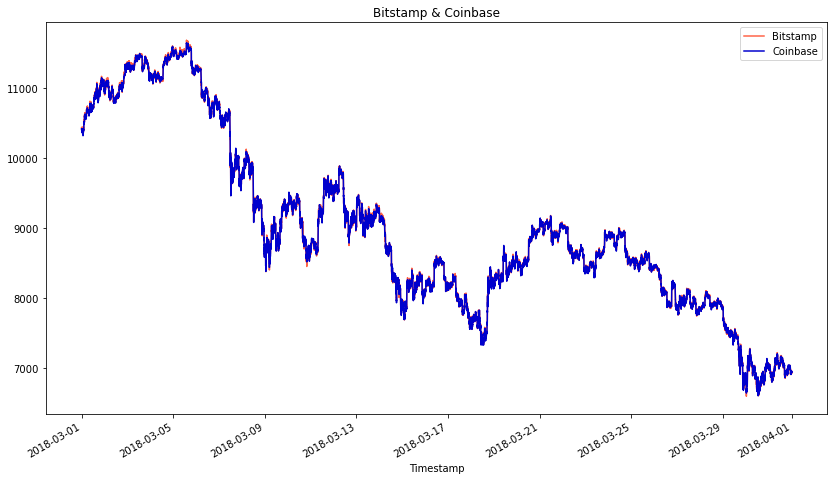

In [41]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
combined_df["03/2018"].plot(figsize=(14, 8), title='Bitstamp & Coinbase', color=['tomato', 'mediumblue'])

C:\Users\ANASTA~1\AppData\Local\Temp/ipykernel_44704/659915990.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  combined_df["01/2018"].plot(figsize=(14, 8), title='Bitstamp & Coinbase', color=['tomato', 'mediumblue'])


<AxesSubplot:title={'center':'Bitstamp & Coinbase'}, xlabel='Timestamp'>

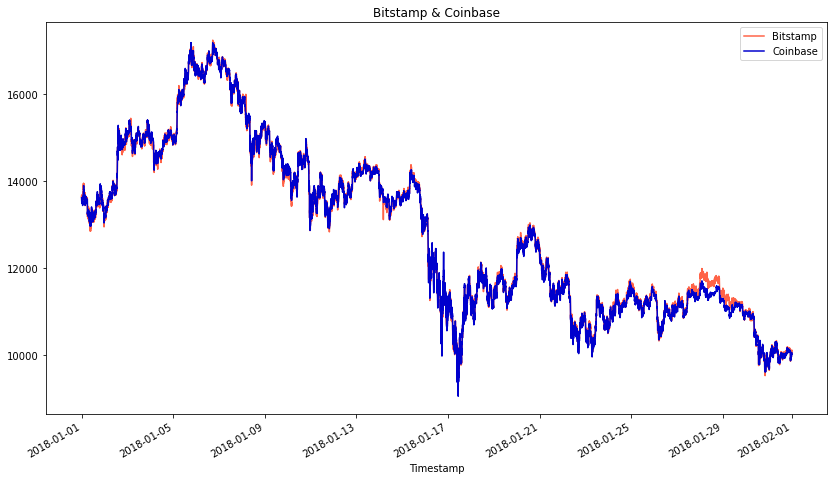

In [42]:
combined_df["01/2018"].plot(figsize=(14, 8), title='Bitstamp & Coinbase', color=['tomato', 'mediumblue'])

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, in January we can see higher level of spread change than in March.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

C:\Users\ANASTA~1\AppData\Local\Temp/ipykernel_44704/521603436.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  combined_df["01/10/2018"].plot(figsize=(14, 8), title='Bitstamp & Coinbase', color=['tomato', 'mediumblue'])


<AxesSubplot:title={'center':'Bitstamp & Coinbase'}, xlabel='Timestamp'>

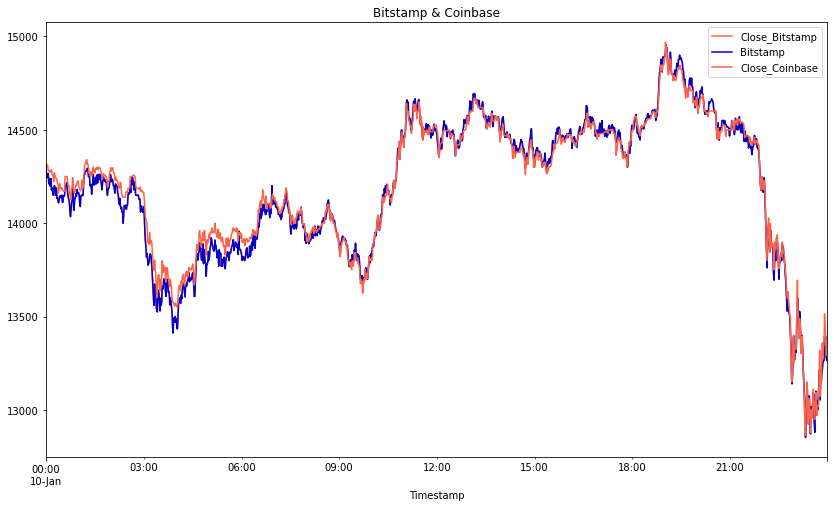

In [46]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
combined_df["01/10/2018"].plot(figsize=(14, 8), title='Bitstamp & Coinbase', color=['tomato', 'mediumblue'])

In [47]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = combined_df.loc['01/10/2018', 'Close_Bitstamp'] - combined_df.loc['01/10/2018', 'Close_Coinbase']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early = arbitrage_spread_early.to_frame()
arbitrage_spread_early.describe()

,0
count,1440.000000
mean,-15.978826
std,45.869721
min,-192.000000
25%,-46.530000
50%,-6.880000
75%,17.787500
max,78.810000


<AxesSubplot:>

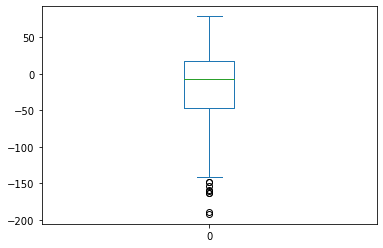

In [49]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

C:\Users\ANASTA~1\AppData\Local\Temp/ipykernel_44704/159993635.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  combined_df["02/10/2018"].plot(figsize=(14, 8), title='February 10, 2018', color=['tomato', 'mediumblue'])


<AxesSubplot:title={'center':'February 10, 2018'}, xlabel='Timestamp'>

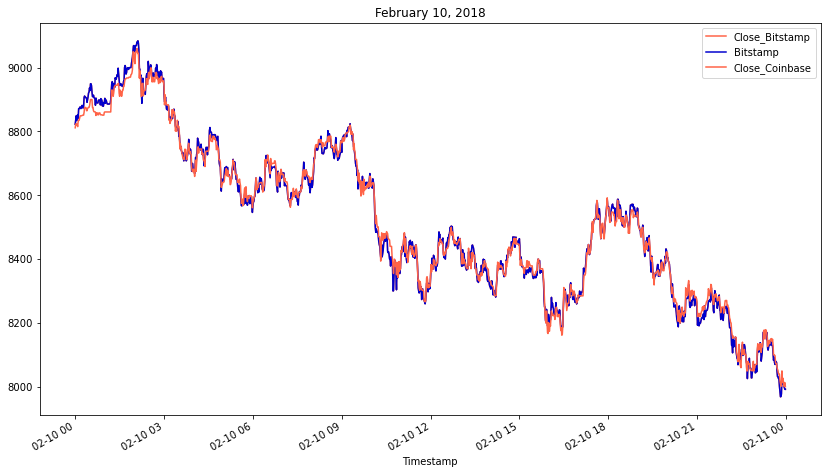

In [53]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
combined_df["02/10/2018"].plot(figsize=(14, 8), title='February 10, 2018', color=['tomato', 'mediumblue'])

In [51]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = combined_df.loc['02/10/2018', 'Close_Bitstamp'] - combined_df.loc['02/10/2018', 'Close_Coinbase']


# Generate summary statistics 
arbitrage_spread_middle = arbitrage_spread_middle.to_frame()
arbitrage_spread_middle.describe()

,0
count,1436.000000
mean,0.364930
std,18.745766
min,-74.540000
25%,-12.180000
50%,-0.010000
75%,12.657500
max,56.130000


<AxesSubplot:>

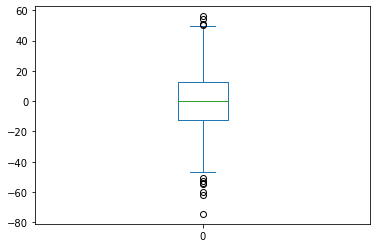

In [52]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

C:\Users\ANASTA~1\AppData\Local\Temp/ipykernel_44704/3723250779.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  combined_df["03/10/2018"].plot(figsize=(14, 8), title='March 10', color=['tomato', 'mediumblue'])


<AxesSubplot:title={'center':'March 10'}, xlabel='Timestamp'>

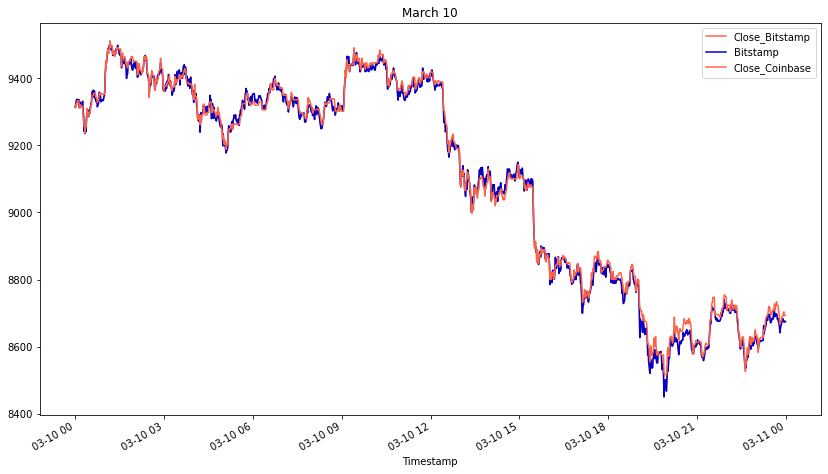

In [55]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
combined_df["03/10/2018"].plot(figsize=(14, 8), title='March 10', color=['tomato', 'mediumblue'])

In [56]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = combined_df.loc['03/10/2018', 'Close_Bitstamp'] - combined_df.loc['03/10/2018', 'Close_Coinbase']


# Generate summary statistics 
arbitrage_spread_late = arbitrage_spread_late.to_frame()
arbitrage_spread_late.describe()

,0
count,1433.000000
mean,-6.541417
std,15.953638
min,-93.180000
25%,-16.040000
50%,-7.170000
75%,4.240000
max,36.860000


<AxesSubplot:>

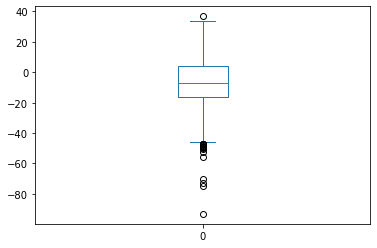

In [57]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [58]:
time_index = pd.to_datetime(bitstamp.index)
bitstamp = bitstamp.set_index(time_index)

In [60]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp.loc['01/10/2018', 'High'] - bitstamp.loc['01/10/2018', 'Low']
arbitrage_spread_middle = bitstamp.loc['02/10/2018', 'High'] - bitstamp.loc['02/10/2018', 'Low']
arbitrage_spread_late = bitstamp.loc['03/10/2018', 'High'] - bitstamp.loc['03/10/2018', 'Low']



# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early > 0].to_frame().describe()

,0
count,1438.000000
mean,52.223679
std,28.959458
min,0.010000
25%,32.247500
50%,48.440000
75%,66.767500
max,217.990000


In [61]:
arbitrage_spread_middle[arbitrage_spread_middle > 0].to_frame().describe()

,0
count,1425.000000
mean,24.905740
std,14.363001
min,0.010000
25%,14.730000
50%,23.130000
75%,32.850000
max,100.450000


In [62]:
arbitrage_spread_late[arbitrage_spread_late > 0].to_frame().describe()

,0
count,1405.000000
mean,18.766520
std,12.184998
min,0.010000
25%,10.600000
50%,16.740000
75%,24.390000
max,93.180000


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [66]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

# Review the spread return DataFrame
bitstamp['arbitrage spread'] = bitstamp['High'] - bitstamp['Low']
bitstamp['spread return'] = bitstamp['arbitrage spread'] / bitstamp['Low']

spread_return_early = bitstamp['01/10/2018'].loc[bitstamp['arbitrage spread'] > 0, 'spread return']
spread_return_early


C:\Users\ANASTA~1\AppData\Local\Temp/ipykernel_44704/1115709541.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  spread_return_early = bitstamp['01/10/2018'].loc[bitstamp['arbitrage spread'] > 0, 'spread return']


Timestamp
2018-01-10 00:00:00    0.005441
2018-01-10 00:01:00    0.004744
2018-01-10 00:02:00    0.004744
2018-01-10 00:03:00    0.004209
2018-01-10 00:04:00    0.006214
                         ...   
2018-01-10 23:55:00    0.002354
2018-01-10 23:56:00    0.002076
2018-01-10 23:57:00    0.008078
2018-01-10 23:58:00    0.005505
2018-01-10 23:59:00    0.005805
Name: spread return, Length: 1438, dtype: float64

In [67]:
bitstamp['arbitrage spread'] = bitstamp['High'] - bitstamp['Low']
bitstamp['spread return'] = bitstamp['arbitrage spread'] / bitstamp['Low']

spread_return_middle = bitstamp['02/10/2018'].loc[bitstamp['arbitrage spread'] > 0, 'spread return']
spread_return_middle

C:\Users\ANASTA~1\AppData\Local\Temp/ipykernel_44704/1250032305.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  spread_return_middle = bitstamp['02/10/2018'].loc[bitstamp['arbitrage spread'] > 0, 'spread return']


Timestamp
2018-02-10 00:00:00    0.001750
2018-02-10 00:01:00    0.000693
2018-02-10 00:02:00    0.001573
2018-02-10 00:03:00    0.004164
2018-02-10 00:04:00    0.003047
                         ...   
2018-02-10 23:54:00    0.002193
2018-02-10 23:56:00    0.002853
2018-02-10 23:57:00    0.002612
2018-02-10 23:58:00    0.001270
2018-02-10 23:59:00    0.000220
Name: spread return, Length: 1425, dtype: float64

In [69]:
bitstamp['arbitrage spread'] = bitstamp['High'] - bitstamp['Low']
bitstamp['spread return'] = bitstamp['arbitrage spread'] / bitstamp['Low']

spread_return_late = bitstamp['03/10/2018'].loc[bitstamp['arbitrage spread'] > 0, 'spread return']
spread_return_late

C:\Users\ANASTA~1\AppData\Local\Temp/ipykernel_44704/3555314289.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  spread_return_late = bitstamp['03/10/2018'].loc[bitstamp['arbitrage spread'] > 0, 'spread return']


Timestamp
2018-03-10 00:00:00    0.002556
2018-03-10 00:01:00    0.001764
2018-03-10 00:02:00    0.000603
2018-03-10 00:03:00    0.001547
2018-03-10 00:04:00    0.001251
                         ...   
2018-03-10 23:55:00    0.002946
2018-03-10 23:56:00    0.002124
2018-03-10 23:57:00    0.001841
2018-03-10 23:58:00    0.002151
2018-03-10 23:59:00    0.002461
Name: spread return, Length: 1405, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [70]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]
profitable_trades_late = spread_return_late[spread_return_late > 0.01]


# Review the first five profitable trades
profitable_trades_early.head(5)

Timestamp
2018-01-10 03:20:00    0.010240
2018-01-10 05:55:00    0.011377
2018-01-10 06:39:00    0.010060
2018-01-10 06:56:00    0.010350
2018-01-10 22:09:00    0.010036
Name: spread return, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [72]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.to_frame().describe()

,spread return
count,25.000000
mean,0.012439
std,0.001997
min,0.010036
25%,0.010974
50%,0.012205
75%,0.013683
max,0.017030


In [73]:
profitable_trades_middle.to_frame().describe()

,spread return
count,3.000000
mean,0.011405
std,0.001237
min,0.010236
25%,0.010758
50%,0.011281
75%,0.011990
max,0.012700


In [74]:
profitable_trades_late.to_frame().describe()

,spread return
count,3.000000
mean,0.010549
std,0.000135
min,0.010400
25%,0.010490
50%,0.010580
75%,0.010623
max,0.010665


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [77]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = spread_return_early * bitstamp['BTC Volume']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-10 00:00:00    0.040837
2018-01-10 00:01:00    0.037590
2018-01-10 00:02:00    0.013195
2018-01-10 00:03:00    0.011468
2018-01-10 00:04:00    0.083580
                         ...   
2018-01-10 23:55:00    0.058895
2018-01-10 23:56:00    0.041006
2018-01-10 23:57:00    0.442749
2018-01-10 23:58:00    0.101951
2018-01-10 23:59:00    0.301701
Length: 1438, dtype: float64

In [81]:
profit_middle = spread_return_middle * bitstamp['BTC Volume']
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle

Timestamp
2018-02-10 00:00:00    0.009440
2018-02-10 00:01:00    0.001648
2018-02-10 00:02:00    0.021795
2018-02-10 00:03:00    0.021120
2018-02-10 00:04:00    0.004029
                         ...   
2018-02-10 23:54:00    0.005064
2018-02-10 23:56:00    0.019948
2018-02-10 23:57:00    0.024029
2018-02-10 23:58:00    0.000653
2018-02-10 23:59:00    0.000251
Length: 1425, dtype: float64

In [82]:
profit_late = spread_return_late * bitstamp['BTC Volume']
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late

Timestamp
2018-03-10 00:00:00    0.001930
2018-03-10 00:01:00    0.002152
2018-03-10 00:02:00    0.001437
2018-03-10 00:03:00    0.002762
2018-03-10 00:04:00    0.001399
                         ...   
2018-03-10 23:55:00    0.004122
2018-03-10 23:56:00    0.002265
2018-03-10 23:57:00    0.000866
2018-03-10 23:58:00    0.003877
2018-03-10 23:59:00    0.002762
Length: 1405, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [78]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.to_frame().describe()

,0
count,1.438000e+03
mean,6.981870e-02
std,1.444371e-01
min,6.781535e-07
25%,1.083399e-02
50%,2.930845e-02
75%,7.065734e-02
max,2.412072e+00


<AxesSubplot:xlabel='Timestamp'>

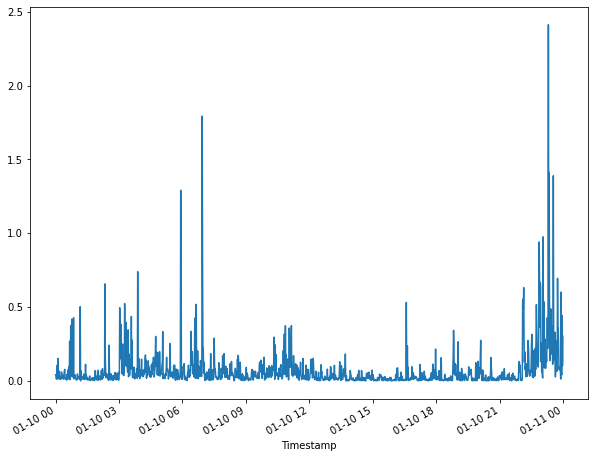

In [79]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10,8))

In [83]:
profit_per_trade_middle.to_frame().describe()

,0
count,1.425000e+03
mean,4.109760e-02
std,1.428847e-01
min,7.217874e-08
25%,3.449349e-03
50%,1.233338e-02
75%,3.924462e-02
max,3.128432e+00


<AxesSubplot:xlabel='Timestamp'>

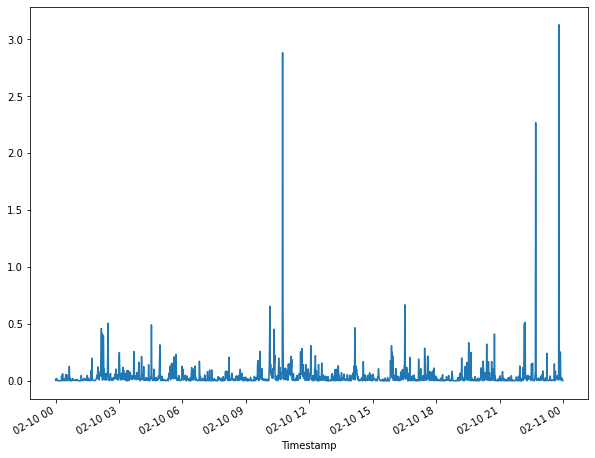

In [84]:
profit_per_trade_middle.plot(figsize=(10,8))

In [85]:
profit_per_trade_late.to_frame().describe()

,0
count,1.405000e+03
mean,3.396562e-02
std,1.374014e-01
min,4.061411e-07
25%,1.902879e-03
50%,7.561724e-03
75%,2.381670e-02
max,2.640704e+00


<AxesSubplot:xlabel='Timestamp'>

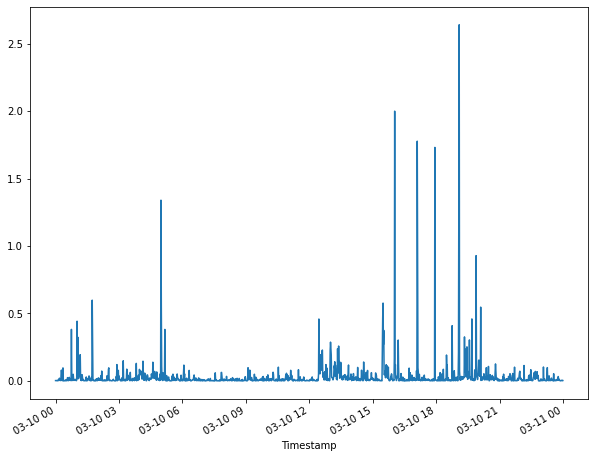

In [86]:
profit_per_trade_late.plot(figsize=(10,8))

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [80]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

100.39928904198689

In [87]:
profit_per_trade_middle.sum()

58.56407402208164

In [88]:
profit_per_trade_late.sum()

47.721692088702255

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [90]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:xlabel='Timestamp'>

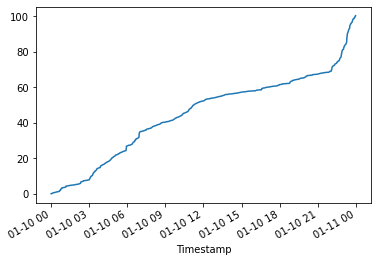

In [91]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot()

In [92]:
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:xlabel='Timestamp'>

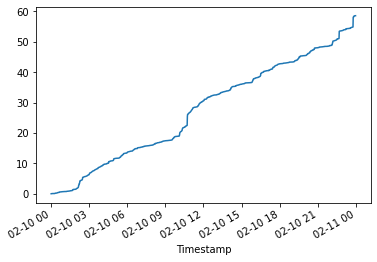

In [93]:
cumulative_profit_middle.plot()

In [94]:
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:xlabel='Timestamp'>

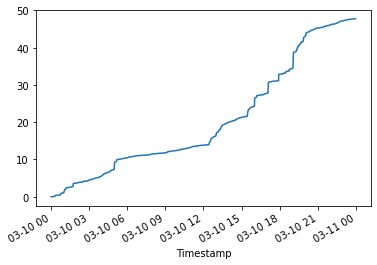

In [95]:
cumulative_profit_late.plot()

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** From January to March, the profit income from buying Bitcoin decreased by more than 2 time. The best month for trade was January out of these 3.